# Predição da Evapotranspiração

## Importação das bibliotecas utilizadas

In [1]:
# Importando os módulos
import csv
import pandas as pd
import matplotlib.pyplot as plt    
import numpy as np  
import statistics
from statistics import median 
from sklearn.linear_model import LinearRegression
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from datetime import datetime, date, time, timezone
import matplotlib.pyplot as plt
%matplotlib inline 

 


## Importação dos dados

In [2]:
df_data = pd.read_csv('../dados/dataset.csv')
df_data.head()

,TIMESTAMP,RECORD,BP_mbar_Max,BP_mbar_Min,Rain_mm_Tot,AirTC_Max,AirTC_Min,RH_Max,RH_Min,SlrkJ_Tot,TdC_Max,TdC_Min,AirTC_Avg,RH_Avg,WS_ms_Avg,SlrkJ_Avg,Eto
0,2015-02-24 22:00:00,13253,600.8486,600.3632,0.000,23.472,23.341,99.998,99.998,0.193834,23.472,23.341,23.39763,99.99786,0.000000,0.000538,0.0002984148
1,2015-02-24 23:00:00,13254,600.7875,600.4396,0.000,23.472,23.26,99.998,99.998,0.137363,23.472,23.260,23.3635,99.99786,0.000000,0.000382,0.0002987745
2,2015-02-25 00:00:00,13255,601.1295,600.7021,0.254,23.371,23.212,99.998,99.998,0.137363,23.371,23.212,23.29213,99.99786,0.002500,0.000382,0.0002994588
3,2015-02-25 01:00:00,13256,601.1752,600.4365,0.000,23.402,23.292,99.998,99.998,0.202992,23.402,23.292,23.34686,99.99786,0.023333,0.000564,0.0002972446
4,2015-02-25 02:00:00,13257,601.1813,600.6227,0.000,23.35,23.212,99.998,99.998,0.203755,23.350,23.212,23.2819,99.99786,0.000000,0.000566,0.0002998548


In [3]:
df_data['TIMESTAMP'] =  pd.to_datetime(df_data['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

Na presente análise, vamos replicar os resultados obtidos em [CAMINHA, Hinessa Dantas], utilizando o mesmo dataset. 

Para considerar o dataset completo, elimine a próxima célula.

data_inicial = datetime.strptime("2016-6-16 00:00:00", "%Y-%m-%d %H:%M:%S")
data_final = datetime.strptime("2016-10-19 23:59:59", "%Y-%m-%d %H:%M:%S")

df_data = df_data[df_data['TIMESTAMP'] > data_inicial]
df_data = df_data.reset_index(drop=True)

In [4]:
df_data['AirTC_Max'] = df_data['AirTC_Max'].astype(np.float64)
df_data['AirTC_Min'] = df_data['AirTC_Min'].astype(np.float64)
df_data['AirTC_Avg'] = df_data['AirTC_Avg'].astype(np.float64)
df_data['Eto'] = df_data['Eto'].astype(np.float64)

df_data.dtypes

TIMESTAMP      datetime64[ns]
RECORD                  int64
BP_mbar_Max           float64
BP_mbar_Min           float64
Rain_mm_Tot           float64
AirTC_Max             float64
AirTC_Min             float64
RH_Max                float64
RH_Min                float64
SlrkJ_Tot             float64
TdC_Max               float64
TdC_Min               float64
AirTC_Avg             float64
RH_Avg                float64
WS_ms_Avg             float64
SlrkJ_Avg             float64
Eto                   float64
dtype: object

In [5]:
pyplotltdf_data = df_data.set_index('TIMESTAMP')

## Limpeza dos dados

In [6]:
df_filtered_data = df_data

### Precipitação

Para essa feature, vamos remover todos os valores (```Rain_mm_Tot```) maiores do que 1.

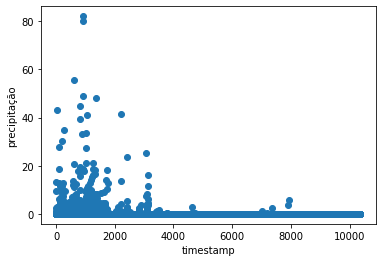

In [7]:
plt.scatter(df_filtered_data.index, df_filtered_data['Rain_mm_Tot'])
plt.xlabel('timestamp')
plt.ylabel('precipitação')
plt.show()

In [8]:
df_filtered_data = df_filtered_data[df_filtered_data['Rain_mm_Tot'] <= 1]
df_filtered_data.shape

(10132, 17)

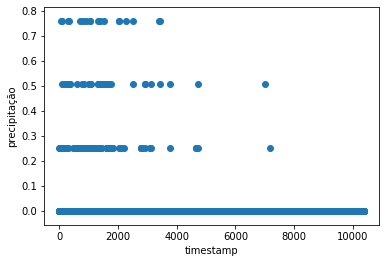

In [9]:
plt.scatter(df_filtered_data.index, df_filtered_data['Rain_mm_Tot'])
plt.xlabel('timestamp')
plt.ylabel('precipitação')
plt.show()

### Velocidade do vento

Para essa feature, vamos remover todos os valores (```WS_ms_Avg```) maiores do que 4.

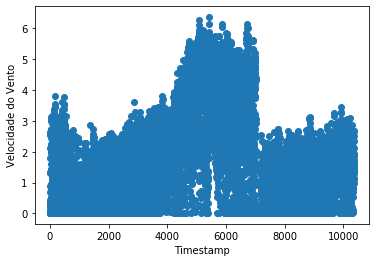

In [10]:
plt.scatter(df_filtered_data.index, df_filtered_data['WS_ms_Avg'])
plt.xlabel('Timestamp')
plt.ylabel('Velocidade do Vento')
plt.show()

In [11]:
df_filtered_data = df_filtered_data[df_filtered_data['WS_ms_Avg'] <=4]
df_filtered_data.shape

(9117, 17)

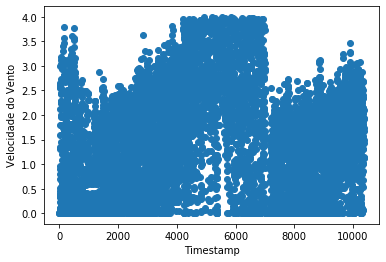

In [12]:
plt.scatter(df_filtered_data.index, df_filtered_data['WS_ms_Avg'])
plt.xlabel('Timestamp')
plt.ylabel('Velocidade do Vento')
plt.show()

### Pressão atmosférica máxima

Para essa feature, vamos remover todos os valores (```BP_mbar_Max```) maiores do que 625.

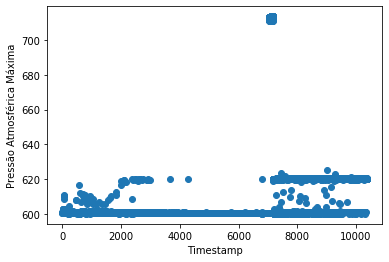

In [13]:
plt.scatter(df_filtered_data.index, df_filtered_data['BP_mbar_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Pressão Atmosférica Máxima')
plt.show()

In [14]:
df_filtered_data = df_filtered_data[df_filtered_data['BP_mbar_Max'] <= 625]
df_filtered_data.shape

(8963, 17)

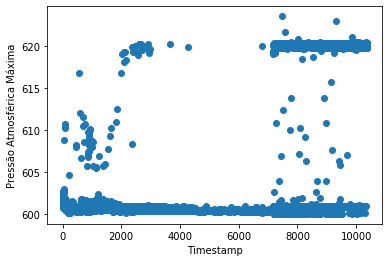

In [15]:
plt.scatter(df_filtered_data.index, df_filtered_data['BP_mbar_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Pressão Atmosférica Máxima')
plt.show()

### Radiação Solar Média

Para essa feature, vamos remover todos os valores (```SlrkJ_Avg```) maiores do que 25.4809.

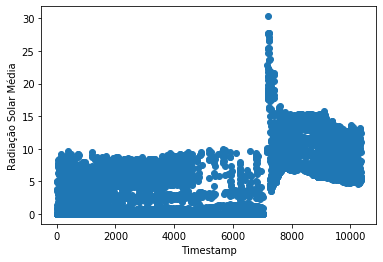

In [16]:
plt.scatter(df_filtered_data.index, df_filtered_data['SlrkJ_Avg'])
plt.xlabel('Timestamp')
plt.ylabel('Radiação Solar Média')
plt.show()

In [17]:
df_filtered_data = df_filtered_data[df_filtered_data['SlrkJ_Avg'] <= 25.4809]
df_filtered_data.shape

(8955, 17)

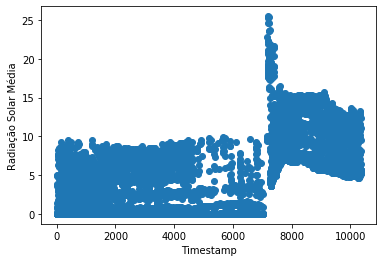

In [18]:
plt.scatter(df_filtered_data.index, df_filtered_data['SlrkJ_Avg'])
plt.xlabel('Timestamp')
plt.ylabel('Radiação Solar Média')
plt.show()

## Radiação Solar Total
Para essa feature, vamos remover todos os valores (```SlrkJ_Tot```) maiores do que 600.0000.

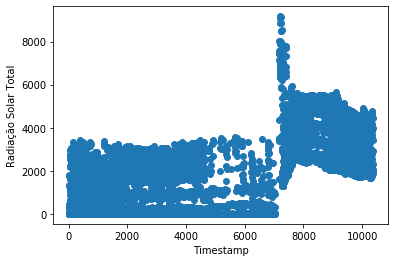

In [19]:
plt.scatter(df_filtered_data.index, df_filtered_data['SlrkJ_Tot'])
plt.xlabel('Timestamp')
plt.ylabel('Radiação Solar Total')
plt.show()

In [20]:
df_filtered_data = df_filtered_data[df_filtered_data['SlrkJ_Tot'] <= 6000000]
df_filtered_data.shape

(8955, 17)

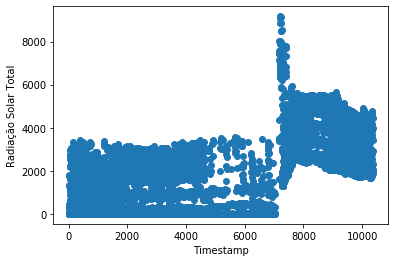

In [21]:
plt.scatter(df_filtered_data.index, df_filtered_data['SlrkJ_Tot'])
plt.xlabel('Timestamp')
plt.ylabel('Radiação Solar Total')
plt.show()

## Temperatura Mínima¶
Para essa feature, vamos remover todos os valores (```TdC_Min```) maiores do que 23.4105.

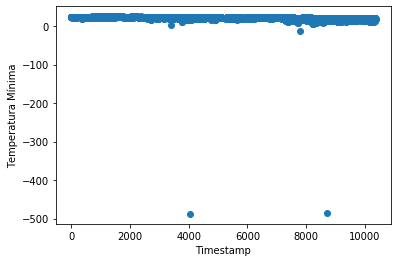

In [22]:
plt.scatter(df_filtered_data.index, df_filtered_data['TdC_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura Mínima')
plt.show()

In [23]:
df_filtered_data = df_filtered_data[df_filtered_data['TdC_Min'] <= 23.4105]
df_filtered_data.shape

(7656, 17)

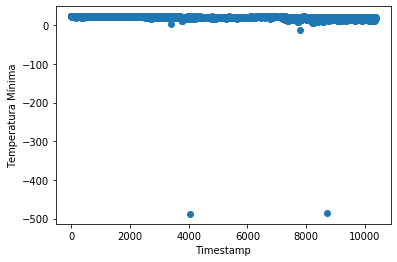

In [24]:
plt.scatter(df_filtered_data.index, df_filtered_data['TdC_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura Mínima')
plt.show()

## Umidade relativa do ar média
Para essa feature, vamos remover todos os valores (```RH_Avg```) maiores do que 99.8006.

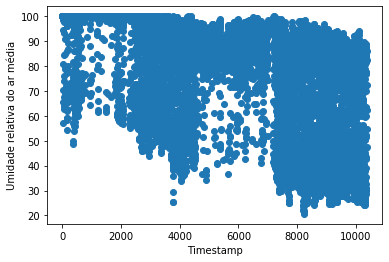

In [25]:
plt.scatter(df_filtered_data.index, df_filtered_data['RH_Avg'])
plt.xlabel('Timestamp')
plt.ylabel('Umidade relativa do ar média')
plt.show()

In [26]:
df_filtered_data = df_filtered_data[df_filtered_data['RH_Avg'] <= 99.8006]
df_filtered_data.shape

(6862, 17)

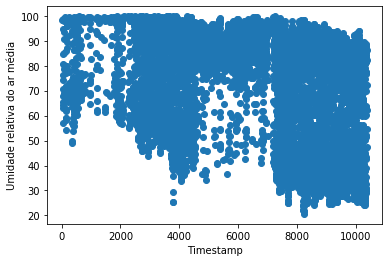

In [27]:
plt.scatter(df_filtered_data.index, df_filtered_data['RH_Avg'])
plt.xlabel('Timestamp')
plt.ylabel('Umidade relativa do ar média')
plt.show()

## Temperatura Máxima¶
Para essa feature, vamos remover todos os valores (```TdC_Max```) maiores do que 24.8820.

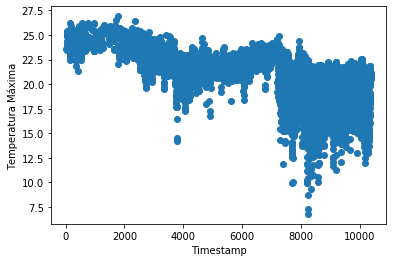

In [28]:
plt.scatter(df_filtered_data.index, df_filtered_data['TdC_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura Máxima')
plt.show()

In [29]:
df_filtered_data = df_filtered_data[df_filtered_data['TdC_Max'] <= 24.8820]
df_filtered_data.shape

(6742, 17)

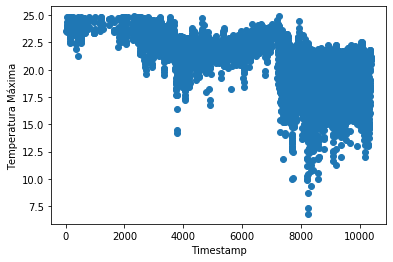

In [30]:
plt.scatter(df_filtered_data.index, df_filtered_data['TdC_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura Máxima')
plt.show()

## Temperatura do ar mínima
Para essa feature, vamos remover todos os valores (```AirTC_Min```) menores do que 1.

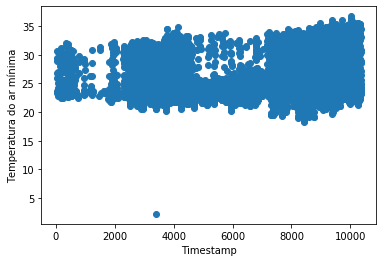

In [31]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar mínima')
plt.show()

In [32]:
df_filtered_data = df_filtered_data[df_filtered_data['AirTC_Min'] >= 1]
df_filtered_data.shape

(6742, 17)

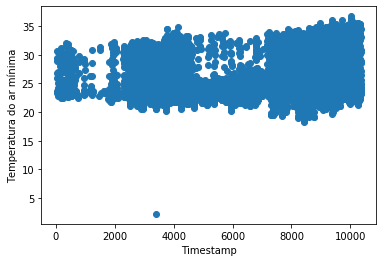

In [33]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar mínima')
plt.show()

## Temperatura do ar mínima¶
Para essa feature, vamos remover todos os valores (```AirTC_Min```) maiores do que 36.692.

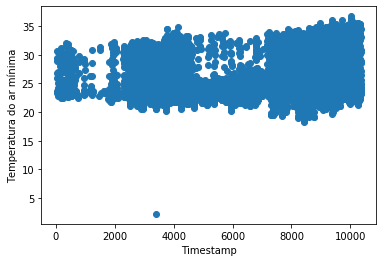

In [34]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar mínima')
plt.show()

In [35]:
df_filtered_data = df_filtered_data[df_filtered_data['AirTC_Min'] <= 36.692]
df_filtered_data.shape

(6742, 17)

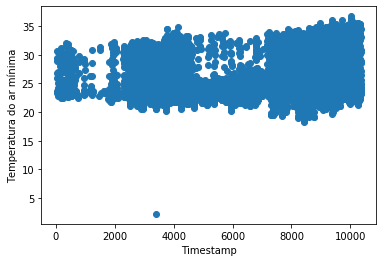

In [36]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar mínima')
plt.show()

## Temperatura do ar máxima
Para essa feature, vamos remover todos os valores (```AirTC_Max```) menores do que 1.

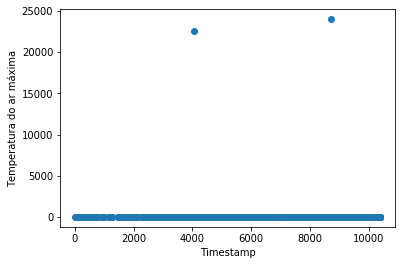

In [37]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar máxima')
plt.show()

In [38]:
df_filtered_data = df_filtered_data[df_filtered_data['AirTC_Max'] >= 1]
df_filtered_data.shape

(6742, 17)

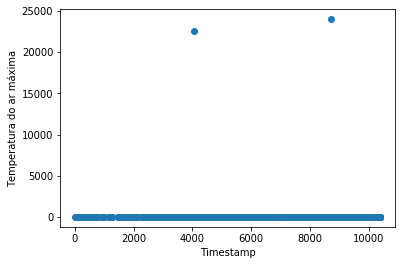

In [39]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar máxima')
plt.show()

## Temperatura do ar máxima
Para essa feature, vamos remover todos os valores (```AirTC_Max```) maiores do que 37.965.

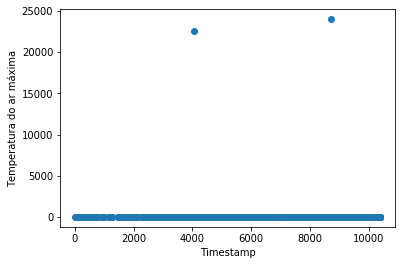

In [40]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar máxima')
plt.show()

In [41]:
df_filtered_data = df_filtered_data[df_filtered_data['AirTC_Max'] <= 37.965]
df_filtered_data.shape

(6740, 17)

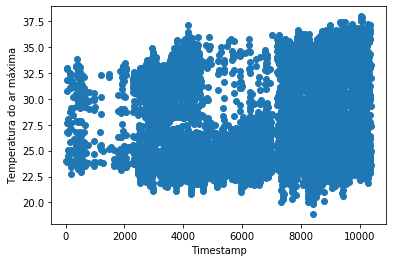

In [42]:
plt.scatter(df_filtered_data.index, df_filtered_data['AirTC_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Temperatura do ar máxima')
plt.show()

## Umidade relativa do ar mínima
Para essa feature, vamos remover todos os valores (```RH_Min```) maiores do que 87.062.

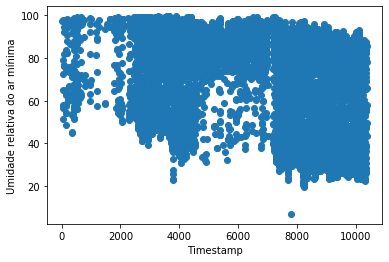

In [43]:
plt.scatter(df_filtered_data.index, df_filtered_data['RH_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Umidade relativa do ar mínima')
plt.show()

In [44]:
df_filtered_data = df_filtered_data[df_filtered_data['RH_Min'] <= 87.062]
df_filtered_data.shape

(4870, 17)

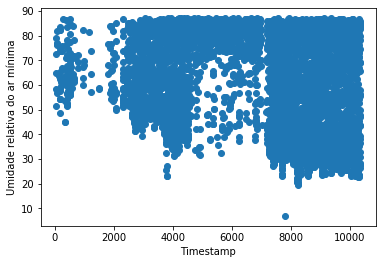

In [45]:
plt.scatter(df_filtered_data.index, df_filtered_data['RH_Min'])
plt.xlabel('Timestamp')
plt.ylabel('Umidade relativa do ar mínima')
plt.show()

## Umidade relativa do ar máxima
Para essa feature, vamos remover todos os valores (```RH_Max```) maiores do que 95.5.

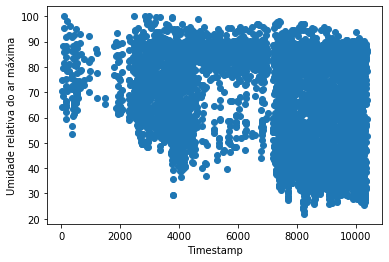

In [46]:
plt.scatter(df_filtered_data.index, df_filtered_data['RH_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Umidade relativa do ar máxima')
plt.show()

In [47]:
df_filtered_data = df_filtered_data[df_filtered_data['RH_Max'] <= 95.5]
df_filtered_data.shape

(4828, 17)

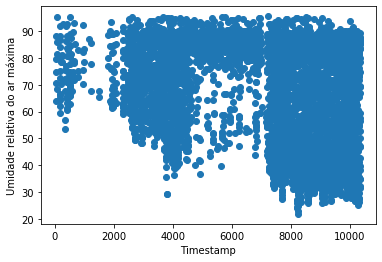

In [48]:
plt.scatter(df_filtered_data.index, df_filtered_data['RH_Max'])
plt.xlabel('Timestamp')
plt.ylabel('Umidade relativa do ar máxima')
plt.show()

In [49]:
df_filtered_data = df_filtered_data.reset_index(drop=True)

In [50]:
df_filtered_data

,TIMESTAMP,RECORD,BP_mbar_Max,BP_mbar_Min,Rain_mm_Tot,AirTC_Max,AirTC_Min,RH_Max,RH_Min,SlrkJ_Tot,TdC_Max,TdC_Min,AirTC_Avg,RH_Avg,WS_ms_Avg,SlrkJ_Avg,Eto
0,2015-02-26 10:00:00,13289,602.5946,600.1435,0.0,30.779,28.820,74.789,64.955,2688.789000,24.40149,22.87083,29.56842,70.52333,2.991668,7.468859,0.090480
1,2015-02-26 11:00:00,13290,602.6710,600.1160,0.0,31.858,29.451,70.508,58.210,2244.866000,24.07819,22.28703,30.25265,65.52249,2.433543,6.235740,0.088931
2,2015-02-26 12:00:00,13291,603.0128,600.2137,0.0,32.976,30.609,64.109,51.567,2966.556000,23.98140,21.32458,31.98515,57.05271,2.254514,8.240433,0.107483
3,2015-02-26 18:00:00,13297,601.6697,600.1038,0.0,27.700,26.838,79.398,72.542,454.306500,23.49309,22.16747,27.37588,76.20817,3.127500,1.261962,0.069209
4,2015-02-26 19:00:00,13298,601.4500,600.0885,0.0,26.818,25.878,88.277,79.066,6.487337,23.84371,22.87845,26.26659,84.55228,2.550417,0.018020,0.026017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,2016-10-19 07:00:00,23615,620.3572,599.7344,0.0,24.954,23.260,85.775,78.117,2295.128000,21.04261,20.69714,24.03117,82.42256,1.119167,6.375355,0.023606
4824,2016-10-19 08:00:00,23616,619.8627,599.7466,0.0,27.388,24.835,78.472,65.828,2914.724000,21.13052,20.18818,26.09203,72.45580,1.931736,8.096457,0.056306
4825,2016-10-19 09:00:00,23617,619.9329,599.7344,0.0,29.270,27.078,66.904,57.888,3410.409000,20.85625,20.01264,28.27324,62.41462,1.920209,9.473359,0.078555
4826,2016-10-19 10:00:00,23618,619.8840,599.7802,0.0,31.978,28.840,59.589,49.726,3977.311000,20.87022,19.44653,30.21831,54.65525,1.432778,11.048090,0.077010


In [51]:
df_data_sample = df_filtered_data

In [52]:
df_data_sample

,TIMESTAMP,RECORD,BP_mbar_Max,BP_mbar_Min,Rain_mm_Tot,AirTC_Max,AirTC_Min,RH_Max,RH_Min,SlrkJ_Tot,TdC_Max,TdC_Min,AirTC_Avg,RH_Avg,WS_ms_Avg,SlrkJ_Avg,Eto
0,2015-02-26 10:00:00,13289,602.5946,600.1435,0.0,30.779,28.820,74.789,64.955,2688.789000,24.40149,22.87083,29.56842,70.52333,2.991668,7.468859,0.090480
1,2015-02-26 11:00:00,13290,602.6710,600.1160,0.0,31.858,29.451,70.508,58.210,2244.866000,24.07819,22.28703,30.25265,65.52249,2.433543,6.235740,0.088931
2,2015-02-26 12:00:00,13291,603.0128,600.2137,0.0,32.976,30.609,64.109,51.567,2966.556000,23.98140,21.32458,31.98515,57.05271,2.254514,8.240433,0.107483
3,2015-02-26 18:00:00,13297,601.6697,600.1038,0.0,27.700,26.838,79.398,72.542,454.306500,23.49309,22.16747,27.37588,76.20817,3.127500,1.261962,0.069209
4,2015-02-26 19:00:00,13298,601.4500,600.0885,0.0,26.818,25.878,88.277,79.066,6.487337,23.84371,22.87845,26.26659,84.55228,2.550417,0.018020,0.026017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,2016-10-19 07:00:00,23615,620.3572,599.7344,0.0,24.954,23.260,85.775,78.117,2295.128000,21.04261,20.69714,24.03117,82.42256,1.119167,6.375355,0.023606
4824,2016-10-19 08:00:00,23616,619.8627,599.7466,0.0,27.388,24.835,78.472,65.828,2914.724000,21.13052,20.18818,26.09203,72.45580,1.931736,8.096457,0.056306
4825,2016-10-19 09:00:00,23617,619.9329,599.7344,0.0,29.270,27.078,66.904,57.888,3410.409000,20.85625,20.01264,28.27324,62.41462,1.920209,9.473359,0.078555
4826,2016-10-19 10:00:00,23618,619.8840,599.7802,0.0,31.978,28.840,59.589,49.726,3977.311000,20.87022,19.44653,30.21831,54.65525,1.432778,11.048090,0.077010


# Criação de novas colunas

In [53]:
time_slot = 6

In [54]:
columns = df_data_sample.columns.tolist()

columns.remove('TIMESTAMP')
columns.remove('RECORD')
columns.remove('Eto')

In [55]:
df_data_sample

,TIMESTAMP,RECORD,BP_mbar_Max,BP_mbar_Min,Rain_mm_Tot,AirTC_Max,AirTC_Min,RH_Max,RH_Min,SlrkJ_Tot,TdC_Max,TdC_Min,AirTC_Avg,RH_Avg,WS_ms_Avg,SlrkJ_Avg,Eto
0,2015-02-26 10:00:00,13289,602.5946,600.1435,0.0,30.779,28.820,74.789,64.955,2688.789000,24.40149,22.87083,29.56842,70.52333,2.991668,7.468859,0.090480
1,2015-02-26 11:00:00,13290,602.6710,600.1160,0.0,31.858,29.451,70.508,58.210,2244.866000,24.07819,22.28703,30.25265,65.52249,2.433543,6.235740,0.088931
2,2015-02-26 12:00:00,13291,603.0128,600.2137,0.0,32.976,30.609,64.109,51.567,2966.556000,23.98140,21.32458,31.98515,57.05271,2.254514,8.240433,0.107483
3,2015-02-26 18:00:00,13297,601.6697,600.1038,0.0,27.700,26.838,79.398,72.542,454.306500,23.49309,22.16747,27.37588,76.20817,3.127500,1.261962,0.069209
4,2015-02-26 19:00:00,13298,601.4500,600.0885,0.0,26.818,25.878,88.277,79.066,6.487337,23.84371,22.87845,26.26659,84.55228,2.550417,0.018020,0.026017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,2016-10-19 07:00:00,23615,620.3572,599.7344,0.0,24.954,23.260,85.775,78.117,2295.128000,21.04261,20.69714,24.03117,82.42256,1.119167,6.375355,0.023606
4824,2016-10-19 08:00:00,23616,619.8627,599.7466,0.0,27.388,24.835,78.472,65.828,2914.724000,21.13052,20.18818,26.09203,72.45580,1.931736,8.096457,0.056306
4825,2016-10-19 09:00:00,23617,619.9329,599.7344,0.0,29.270,27.078,66.904,57.888,3410.409000,20.85625,20.01264,28.27324,62.41462,1.920209,9.473359,0.078555
4826,2016-10-19 10:00:00,23618,619.8840,599.7802,0.0,31.978,28.840,59.589,49.726,3977.311000,20.87022,19.44653,30.21831,54.65525,1.432778,11.048090,0.077010


In [56]:
for column in columns:

    # soma
    df_data_sample[column + '_sum'] = 0
    # desvio padrão
    df_data_sample[column + '_std'] = 0
    # mínimo
    df_data_sample[column + '_min'] = 0
    # máximo
    df_data_sample[column + '_max'] = 0
    # média
    df_data_sample[column + '_avg'] = 0
    
    for line in range(time_slot, df_data_sample.shape[0]):
        values = []
        for i in range(1, time_slot+1):
            values.append(float(df_data_sample.loc[line-i, column]))

        df_data_sample.loc[line, str(column + '_sum')] = sum(values)
        df_data_sample.loc[line, str(column + '_std')] = statistics.stdev(values)
        df_data_sample.loc[line, str(column + '_min')] = min(values)
        df_data_sample.loc[line, str(column + '_max')] = max(values)
        df_data_sample.loc[line, str(column + '_avg')] = sum(values)/len(values) 

In [57]:
df_data_sample

,TIMESTAMP,RECORD,BP_mbar_Max,BP_mbar_Min,Rain_mm_Tot,AirTC_Max,AirTC_Min,RH_Max,RH_Min,SlrkJ_Tot,...,WS_ms_Avg_sum,WS_ms_Avg_std,WS_ms_Avg_min,WS_ms_Avg_max,WS_ms_Avg_avg,SlrkJ_Avg_sum,SlrkJ_Avg_std,SlrkJ_Avg_min,SlrkJ_Avg_max,SlrkJ_Avg_avg
0,2015-02-26 10:00:00,13289,602.5946,600.1435,0.0,30.779,28.820,74.789,64.955,2688.789000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-02-26 11:00:00,13290,602.6710,600.1160,0.0,31.858,29.451,70.508,58.210,2244.866000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2015-02-26 12:00:00,13291,603.0128,600.2137,0.0,32.976,30.609,64.109,51.567,2966.556000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2015-02-26 18:00:00,13297,601.6697,600.1038,0.0,27.700,26.838,79.398,72.542,454.306500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2015-02-26 19:00:00,13298,601.4500,600.0885,0.0,26.818,25.878,88.277,79.066,6.487337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,2016-10-19 07:00:00,23615,620.3572,599.7344,0.0,24.954,23.260,85.775,78.117,2295.128000,...,10.390833,0.243141,1.473055,2.108264,1.731806,32.668905,0.164122,5.212336,5.616478,5.444818
4824,2016-10-19 08:00:00,23616,619.8627,599.7466,0.0,27.388,24.835,78.472,65.828,2914.724000,...,10.036945,0.341494,1.119167,2.108264,1.672824,33.529817,0.417661,5.212336,6.375355,5.588303
4825,2016-10-19 09:00:00,23617,619.9329,599.7344,0.0,29.270,27.078,66.904,57.888,3410.409000,...,10.065278,0.345492,1.119167,2.108264,1.677546,36.013344,1.107651,5.212336,8.096457,6.002224
4826,2016-10-19 10:00:00,23618,619.8840,599.7802,0.0,31.978,28.840,59.589,49.726,3977.311000,...,10.303126,0.359516,1.119167,2.108264,1.717188,40.095666,1.733904,5.212336,9.473359,6.682611


# Predição do ET0

In [58]:
import math

train_percentage = 0.7
linha_fim_treino = math.floor(train_percentage * df_data_sample.shape[0])
linha_fim_teste = df_data_sample.shape[0]
df_data_sample.iloc[0:linha_fim_treino].to_csv('../dados/ttrain.csv')
df_data_sample.iloc[linha_fim_treino:linha_fim_teste].to_csv('../dados/ttest.csv')

## Criação de modelos e testes

In [61]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/naelia/anaconda3/envs/pibic/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9w7xr7bw
  JVM stdout: /tmp/tmp9w7xr7bw/h2o_naelia_started_from_python.out
  JVM stderr: /tmp/tmp9w7xr7bw/h2o_naelia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Fortaleza
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.2
H2O cluster version age:,2 months and 22 days
H2O cluster name:,H2O_from_python_naelia_7yl1gi
H2O cluster total nodes:,1
H2O cluster free memory:,942 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [60]:
h2o.cluster().shutdown()

H2O session _sid_aa96 closed.


In [62]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("../dados/ttrain.csv")
test = h2o.import_file("../dados/ttest.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
x = train.columns
y = "Eto"
x.remove(y)

In [64]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [65]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200608_173250,1.3454e-05,0.00366798,1.3454e-05,0.00241045,0.00335128
StackedEnsemble_BestOfFamily_AutoML_20200608_173250,1.35148e-05,0.00367624,1.35148e-05,0.0024226,0.00335914
XGBoost_grid__1_AutoML_20200608_173250_model_4,1.37767e-05,0.0037117,1.37767e-05,0.00243213,0.0033878
XGBoost_2_AutoML_20200608_173250,1.47174e-05,0.00383632,1.47174e-05,0.00250542,0.00351542
XGBoost_1_AutoML_20200608_173250,1.48203e-05,0.00384972,1.48203e-05,0.0024953,0.00351842
XGBoost_3_AutoML_20200608_173250,1.48278e-05,0.00385068,1.48278e-05,0.00252569,0.0035129
XGBoost_grid__1_AutoML_20200608_173250_model_3,1.56783e-05,0.00395959,1.56783e-05,0.00256299,0.003619
XGBoost_grid__1_AutoML_20200608_173250_model_2,1.57737e-05,0.00397161,1.57737e-05,0.00251747,0.00361959
GBM_3_AutoML_20200608_173250,1.62826e-05,0.00403517,1.62826e-05,0.00258144,0.0036994
GBM_2_AutoML_20200608_173250,1.73811e-05,0.00416906,1.73811e-05,0.00269879,0.00382366


In [66]:
# The leader model is stored here
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200608_173250

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1.911534149957391e-06
RMSE: 0.0013825824206742218
MAE: 0.001025434764619693
RMSLE: 0.0012805906352907261
R^2: 0.999304544414874
Mean Residual Deviance: 1.911534149957391e-06
Null degrees of freedom: 3378
Residual degrees of freedom: 3372
Null deviance: 9.287543346906777
Residual deviance: 0.006459073892706025
AIC: -34888.14872251566

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1.3454042989804405e-05
RMSE: 0.0036679753256809683
MAE: 0.002410451891385635
RMSLE: 0.0033512767052353513
R^2: 0.9951051414174352
Mean Residual Deviance: 1.3454042989804405e-05
Null degrees of freedom: 3378
Residual degrees of freedom: 3373
Null deviance: 9.294340967148427
Residual deviance: 0.04546121126254908
AIC: -28296.457614002895
